# The forecaster's toolbox

## Some simple forecasting methods

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [64]:
import forecast_utils as utils

In [195]:
df = utils.load_csv_quarters("./data/ausbeer.csv", period=True)

### Naïve forecast

$\hat{y}_{T+h|T} = y_T$

In [280]:
def naive(df, h):
    if df.empty:
        freq = None
    else:
        freq = df.index.freq
        if not freq:
            freq = df.index.to_period().freq
    res = df[-h:].copy()
    res.index = res.index + h * freq
    for col in df.columns:
        res[col] = df[col].iloc[-1]
    return res

In [281]:
df.append(naive(df,10))

,value
index,
1956Q1,284
1956Q2,213
1956Q3,227
1956Q4,308
1957Q1,262
1957Q2,228
1957Q3,236
1957Q4,320
1958Q1,272


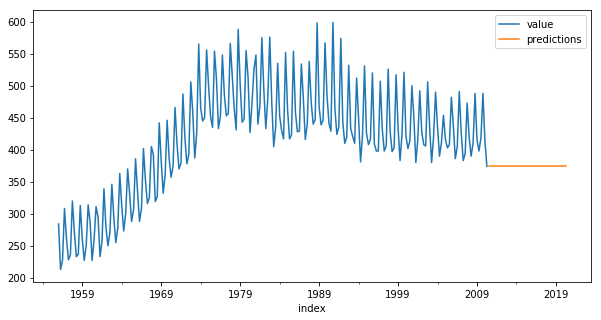

In [282]:
appended_df = df.copy()
naive_df = naive(df, 40)
naive_df.columns = ["predictions"]
appended_df = appended_df.merge(naive_df, how="outer", left_index=True, right_index=True)
appended_df.plot(figsize=(10,5));

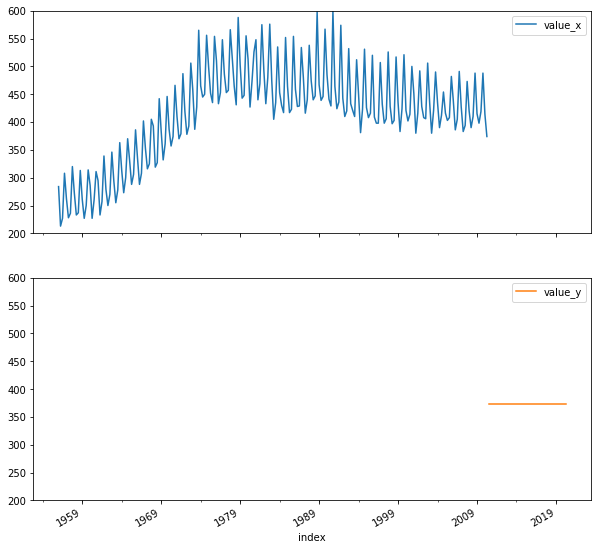

In [283]:
df.merge(naive(df, 40), how="outer", left_index=True, right_index=True).plot(subplots=True, figsize=(10,10), ylim=[200,600]);

## Seasonal naïve method

$\hat{y}_{T+h|T} = y_{T+h-m(k+1)} \text{ where } k = \lfloor \frac{h-1}{m} \rfloor$

**TODO**

In [197]:
import math

In [284]:
def snaive(df, h, m):
    if df.empty:
        freq = None
    else:
        freq = df.index.freq
        if not freq:
            freq = df.index.to_period().freq
    res = df[-h:].copy()
    res.index = res.index + h * freq
    for col in df.columns:
        for i in range(h):
            old_index = len(df) - (m - i % m)
            res[col].iloc[i] = df[col].iloc[old_index]
    return res

In [285]:
df.append(snaive(df, 24, 12))

,value
index,
1956Q1,284
1956Q2,213
1956Q3,227
1956Q4,308
1957Q1,262
1957Q2,228
1957Q3,236
1957Q4,320
1958Q1,272


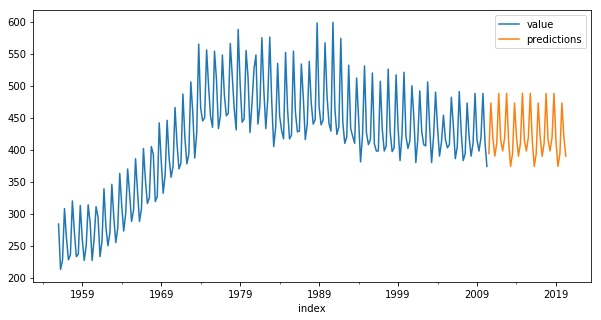

In [286]:
appended_df = df.copy()
snaive_df = snaive(df, 40, 12)
snaive_df.columns = ["predictions"]
appended_df = appended_df.merge(snaive_df, how="outer", left_index=True, right_index=True)
appended_df.plot(figsize=(10,5));

## Drift method

$\hat{y}_{T+h|T} = y_{T} + \frac{h}{T-1}\sum_{t=2}^{T}{y_t - y_{t-1}} = y_T + h \frac{y_T - y_1}{T-1}$

In [287]:
def drift(df, h):
    if df.empty:
        freq = None
    else:
        freq = df.index.freq
        if not freq:
            freq = df.index.to_period().freq
    res = df[-h:].copy()
    res.index = res.index + h * freq
    for col in df.columns:
        if len(df) > 1:
            slope = (df[col].iloc[-1] - df[col].iloc[0])/(len(df)-1)
        else:
            slope = 0
        for i in range(h):
            res[col].iloc[i] = float(df[col].iloc[-1] + (i+1) * slope)
    return res

In [288]:
df.append(drift(df, 24))

,value
index,
1956Q1,284.000000
1956Q2,213.000000
1956Q3,227.000000
1956Q4,308.000000
1957Q1,262.000000
1957Q2,228.000000
1957Q3,236.000000
1957Q4,320.000000
1958Q1,272.000000


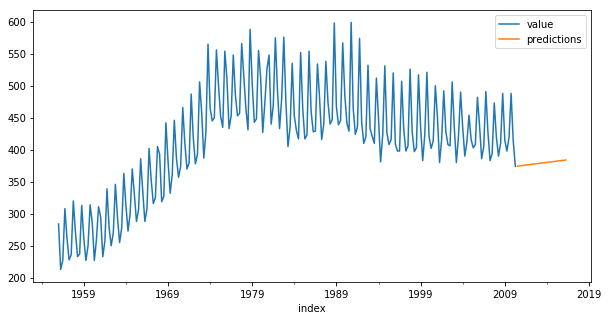

In [289]:
appended_df = df.copy()
drift_df = drift(df, 24)
drift_df.columns = ["predictions"]
appended_df = appended_df.merge(drift_df, how="outer", left_index=True, right_index=True)
appended_df.plot(figsize=(10,5));

## Transformations and adjustments

### Calendar adjustments

In [294]:
df = utils.load_csv_quarters("./data/milk.csv", period=True)

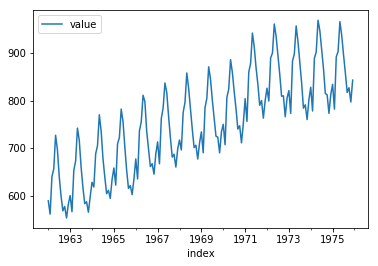

In [296]:
df.plot();

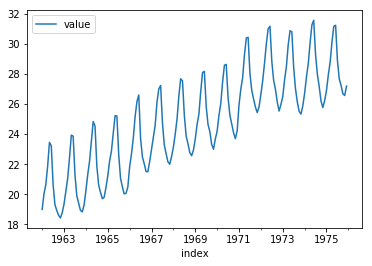

In [316]:
df.divide(df.index.daysinmonth, axis=0).plot();

### Mathematical Transformations

In [324]:
from scipy.stats import boxcox

In [328]:
df = utils.load_csv_quarters("./data/elec.csv", period=True)

In [339]:
new_df, lambda_ = boxcox(df)

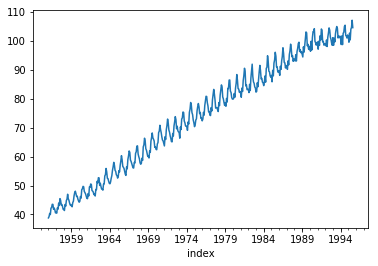

In [350]:
pd.Series(data=new_df.flatten(), index=df.index).plot()

### Bias adjustments

**TODO**

## Residual diagnostics

### Fitted values